# Linear regression implemented with PyTorch
___

See the model implementation [here](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/linear_regression.py).

## 1. Libraries

In [48]:
import os
import sys


# Adding the path to the algorithms modules
ALGOS_PATH = os.path.join("..", "algos")
sys.path.append(ALGOS_PATH)

import torch
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from linear_regression import LinearRegression

## 2. Dataset

### 2.1. Generating the dataset

In [49]:
# Creating a mock dataset with sklearn
X, y = make_regression(
    n_samples=150, 
    n_features=1, n_informative=1, 
    n_targets=1, 
    noise=10,
    random_state=42
)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 1)
y shape: (150,)


### 2.2. Visualizing the dataset

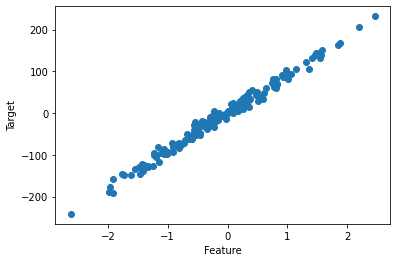

In [50]:
plt.scatter(X[:, 0], y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

## 3. Training and evaluation

### 3.1. Training

Here the model is trained using the *Ordinary Least Squares* (*OLS*) method.
It is also possible to use *Gradient Descent* for training but *OLS* is faster for
*Linear Regression*, since we are directly calculating the weights.


Below I've derived the formula that is used in the [code](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/linear_regression.py):
$$ X \in \mathbb{R}^{m \times n}, \textbf{y} \in \mathbb{R}^{m \times 1}, \textbf{w} \in \mathbb{R}^{n \times 1}$$
where $X$ is the *feature matrix*, $\textbf{y}$ is the *ground truth vector*, $\textbf{w}$ is the *weights vector*

A prediction is made as:
$$ \textbf{y}_{pred} = X\textbf{w} $$
Defining the *MSE* loss function:
$$ L = \frac{1}{2}(\textbf{y}_{pred} - \textbf{y})^2 $$

Using *differential calculus* and the *chain rule*, we can then derive the final formula
in these steps:

If we define $(\textbf{y}_{pred} - \textbf{y}) = E$,
$$\frac{\partial{L}}{\partial{\textbf{w}}} = \frac{\partial{L}}{\partial{E}} \frac{\partial{E}}{\partial{\textbf{y}_{pred}}} \frac{\partial{\textbf{y}_{pred}}}{\partial{\textbf{w}}} $$
We then calculate each partial derivative at the right-hand side,
$$ \frac{\partial{L}}{\partial{E}} = (\textbf{y}_{pred} - \textbf{y}) $$
$$ \frac{\partial{E}}{\partial{\textbf{y}_{pred}}} = \textbf{1} $$
$$ \frac{\partial{\textbf{y}_{pred}}}{\partial{\textbf{w}}} = X $$

Moving each of these to the original equation results in:
$$ \frac{\partial{L}}{\partial{\textbf{w}}} = (\textbf{y}_{pred} - \textbf{y}) X $$

Since we want to find the extremum (minimum) of the loss function, we want to solve this equation:
$$ \frac{\partial{L}}{\partial{\textbf{w}}} = \textbf{0} $$
which is equal to
$$ (\textbf{y}_{pred} - \textbf{y}) X = 0$$
$$ (X\textbf{w} - \textbf{y}) X = 0 $$
$$ X^\intercal X\textbf{w} - X^\intercal \textbf{y} = 0 $$
$$ X^\intercal X\textbf{w} = X^\intercal \textbf{y} $$
and finally defining $\textbf{w}$, by multiplying each side by $(X^\intercal X)^{-1}$,
$$ \textbf{w} = (X^\intercal X)^{-1}X^\intercal \textbf{y} $$

This last equation is used in the [code](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/linear_regression.py), in `fit()`.

Let's continue with the usage of the model class and its training.

In [51]:
X, y = torch.Tensor(X), torch.Tensor(y).unsqueeze(-1)

# Splitting the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train, use_bias=True)

### 3.2. Model evaluation

MSE Loss: 84.86


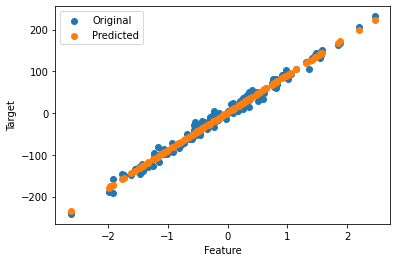

In [52]:

loss = regressor.evaluate(X_valid, y_valid)
print(f"MSE Loss: {loss:.2f}")
 
# Visual representation of the model predictions
y_pred = regressor.predict(X)
plt.scatter(X[:, 0], y, label="Original")
plt.scatter(X[:, 0], y_pred, label="Predicted")
plt.xlabel("Feature")
plt.ylabel("Target")

plt.legend()
plt.show()